# Vertical interpolation

In [1]:
from nes import *
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

## 1. Interpolation with vertical coordinate and variable to interpolate in one file

### 1.1. Read dataset to interpolate

In [2]:
# Original path: /esarchive/exp/monarch/a4dd/original_files/000/2022111512/MONARCH_d01_2022111512.nc
# Rotated grid from MONARCH
source_path = '/gpfs/projects/bsc32/models/NES_tutorial_data/MONARCH_d01_2022111512.nc'
var_name = 'O3'

In [3]:
source_grid = open_netcdf(path=source_path)

Selecting only one time step and one variable

In [4]:
source_grid.sel(time_min=datetime(year=2022, month=11, day=16, hour=0), 
                time_max=datetime(year=2022, month=11, day=16, hour=0))
source_grid.keep_vars([var_name, 'mid_layer_height_agl'])
source_grid.load()

Set the vertical component variable

In [5]:
source_grid.vertical_var_name = 'mid_layer_height_agl'

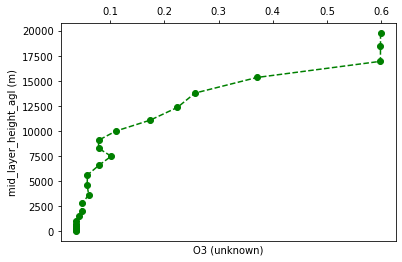

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(source_grid.variables[var_name]['data'][0, :, 146, 90], 
        source_grid.variables['mid_layer_height_agl']['data'][0, :, 146, 90], 
        'go--')

ax.xaxis.tick_top()
ax.set_ylabel('mid_layer_height_agl' + " ({0})".format(source_grid.variables['mid_layer_height_agl']['units']))
ax.set_xlabel(var_name + " ({0})".format(source_grid.variables[var_name]['units']))

plt.show()

### 1.2. Interpolate

In [7]:
level_list = [0.,50.,100.,250.,500.,750.,1000.,2000.,3000.,5000.]

### Linear (recommended & faster)

In [8]:
%time interp_linear = source_grid.interpolate_vertical(level_list, kind='linear')

CPU times: user 3.48 s, sys: 3.01 ms, total: 3.49 s
Wall time: 3.5 s


### Nearest

In [9]:
%time interp_nearest = source_grid.interpolate_vertical(level_list, kind='nearest')

CPU times: user 17.9 s, sys: 42.2 ms, total: 18 s
Wall time: 18 s


### Cubic

In [10]:
%time interp_cubic = source_grid.interpolate_vertical(level_list, kind='cubic')

CPU times: user 39 s, sys: 22.3 ms, total: 39 s
Wall time: 39.2 s


### Quadratic

In [11]:
%time interp_quad = source_grid.interpolate_vertical(level_list, kind='quadratic')

CPU times: user 39.3 s, sys: 31.2 ms, total: 39.3 s
Wall time: 39.5 s


## Plot results

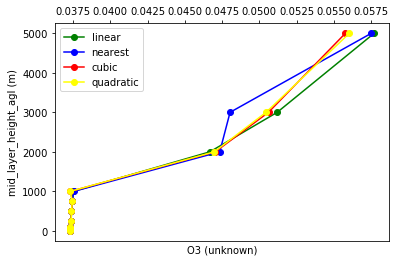

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(interp_linear.variables[var_name]['data'][0, :, 146, 90], 
        level_list, 
        color='green', marker='o', label = 'linear')

ax.plot(interp_nearest.variables[var_name]['data'][0, :, 146, 90], 
        level_list, 
        color='blue', marker='o', label = 'nearest')

ax.plot(interp_cubic.variables[var_name]['data'][0, :, 146, 90], 
        level_list, 
        color='red', marker='o', label = 'cubic')

ax.plot(interp_quad.variables[var_name]['data'][0, :, 146, 90], 
        level_list, 
        color='yellow', marker='o', label = 'quadratic')

ax.xaxis.tick_top()
ax.set_ylabel('mid_layer_height_agl' + " ({0})".format(source_grid.variables['mid_layer_height_agl']['units']))
ax.set_xlabel(var_name + " ({0})".format(source_grid.variables[var_name]['units']))

ax.legend()
plt.show()